Примечания к задачам:

Необходимо использовать модуль numpy
Все данные должны считываться из файла в виде массива numpy
Результаты необходимо сохранять в файл


In [59]:
import numpy as np

Генерируем даныые в файл

In [ ]:
import numpy as np

# Задача 1: p матриц (n, n) и p векторов (n, 1)
n = 3
p = 4
matrices = [np.random.randint(0, 10, (n, n)) for _ in range(p)]
vectors = [np.random.randint(0, 10, (n, 1)) for _ in range(p)]

# Задача 2: Вектор чисел для преобразования в матрицу бинарных представлений
# Вектор чисел в диапазоне от 0 до 255
vector_for_binary = np.random.randint(0, 256, n)

# Задача 3: Матрица для поиска уникальных строк
matrix_with_duplicates = np.array([[1, 2],
                                  [2, 3],
                                  [1, 2]])

# Задача 4: Размер матрицы (M, N) для заполнения случайными числами
M, N = 6, 4  # Матрица 6x4

# Задача 5: Размеры матрицы и числа a, b для шахматного заполнения
a, b = 1, 2
chessboard_size = (5, 5)  # Матрица 5x5

# Задача 6: Параметры для изображения круга
circle_radius = 5
circle_color = [255, 0, 0]  # Красный цвет в RGB

# Задача 7: Тензор для стандартизации
tensor_for_standardization = np.random.rand(4, 4, 3)  # Пример 3D массив

# Задача 8: Матрица и параметры для выделения части с центром в заданном элементе
matrix_for_crop = np.random.randint(0, 10, (8, 8))
crop_size = (3, 3)  # Размер выделяемой части
center_position = (4, 4)  # Центр выделяемой части
fill_value = -1

# Задача 9: Матрица для поиска самого часто встречающегося числа в каждой строке
matrix_for_counters = np.random.randint(0, 5, (5, 10))

# Задача 10: 3D массив для изображения и вектор весов
height, width, numChannels = 6, 6, 3
image_array = np.random.randint(0, 256, (height, width, numChannels))
channel_weights = np.array([0.3, 0.6, 0.1])

# Сохраняем все данные в файл
with open("input_data.npz", "wb") as f:
    np.savez(f,
             matrices=matrices,
             vectors=vectors,
             vector_for_binary=vector_for_binary,
             matrix_with_duplicates=matrix_with_duplicates,
             M=M, N=N,
             a=a, b=b, chessboard_size=chessboard_size,
             circle_radius=circle_radius, circle_color=circle_color,
             tensor_for_standardization=tensor_for_standardization,
             matrix_for_crop=matrix_for_crop, crop_size=crop_size,
             center_position=center_position, fill_value=fill_value,
             matrix_for_counters=matrix_for_counters,
             image_array=image_array, channel_weights=channel_weights)

Загружаем данные из файла

In [150]:
data = np.load('input_data.npz')

Перезаписываем перемнные из файла

In [151]:
locals().update(data)

Задача 1
Дано множество из p матриц (n,n) и множество из p векторов (n,1). Написать функцию для рассчета суммы p произведений матриц (результат имеет размерность (n,1))


In [63]:
def sum_of_multiply_of_matrices(matrices, vectors):
    result = sum(
        np.dot(matrix, vector)
        for matrix, vector in zip(matrices, vectors))
    return result

In [64]:
print("Входные данные:", matrices, vectors)
print("Результат:\n", sum_of_multiply_of_matrices(matrices, vectors))

Входные данные: [[[2 5 6]
  [2 3 9]
  [0 4 8]]

 [[9 8 4]
  [3 9 8]
  [7 4 1]]

 [[2 0 1]
  [9 1 1]
  [8 5 5]]

 [[7 7 9]
  [0 9 4]
  [1 3 2]]] [[[1]
  [9]
  [2]]

 [[3]
  [7]
  [9]]

 [[2]
  [2]
  [7]]

 [[0]
  [4]
  [4]]]
Результат:
 [[253]
 [270]
 [191]]



Задача 2
Написать функцию преобразовывающую вектор чисел в матрицу бинарных представлений.


In [65]:
def vector_to_binary_matrix(vector):
    binary_matrix = np.array(
        [np.binary_repr(num, 8) for num in vector])
    return binary_matrix

In [70]:
print("Входные данные:\n", vector_for_binary)
print("Результат\n", vector_to_binary_matrix(vector_for_binary))

Входные данные:
 [ 84  14 218]
Результат
 ['01010100' '00001110' '11011010']



Задача 3
Написать функцию, которая возвращает все уникальные строки матрицы


In [67]:
def uniq(matrix):
    return np.unique(matrix, axis=0)

In [69]:
print("Входные данные:\n", matrix_with_duplicates)
print("Результат\n", uniq(matrix_with_duplicates))

Входные данные:
 [[1 2]
 [2 3]
 [1 2]]
Результат
 [[1 2]
 [2 3]]



Задача 4
Написать функцию, которая заполняет матрицу с размерами (M,N) случайными числами распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов, а также строит для каждой строки стоит гистограмму значений (использовать функцию hist из модуля matplotlib.plot)


In [75]:
import matplotlib.pyplot as plt


def random_matrix_statistics(M, N):
    # Матрица с нормальным распределением
    matrix = np.random.normal(loc=0, scale=1, size=(M, N))
    mean = matrix.mean(axis=0)

    variance = matrix.var(axis=0)

    # Строим гистограммы
    for i, row in enumerate(matrix):
        plt.hist(row, bins=10, alpha=0.7, label=f"Row {i + 1}")
    plt.title("Гистограммы строк матрицы")
    plt.legend()
    plt.show()

    return matrix, mean, variance

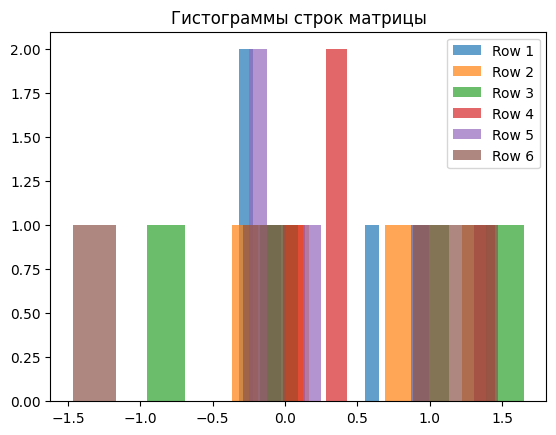

Сгенерированная матрица:
 [[-0.25427666 -0.32085667 -0.1177619   0.65119672]
 [ 0.76544855 -0.36348786  1.39499903  0.07189928]
 [ 1.65015945  0.08712956  1.03795984 -0.95085643]
 [ 0.37472362  0.4060018   1.44910903 -0.01172766]
 [-0.24669201  0.16741788  0.99643822 -0.19127408]
 [ 0.98095093  1.47403716 -0.19066574 -1.46518304]]
Мат. ожидание по столбцам:
 [ 0.54505231  0.24170698  0.76167975 -0.31599087]
Дисперсия по столбцам:
 [0.45910694 0.37629703 0.44757902 0.48628965]


In [76]:
matrix, mean, variance = random_matrix_statistics(data["M"], data["N"])
print("Сгенерированная матрица:\n", matrix)
print("Мат. ожидание по столбцам:\n", mean)
print("Дисперсия по столбцам:\n", variance)


Задача 5
Написать функцию, которая заполняет матрицу (M,N) в шахматном порядке заданными числами a и b.


In [77]:
def chessboard_matrix(shape, a, b):
    """
    Создает матрицу с заданным размером, заполненную в шахматном порядке числами `a` и `b`.
    """
    M, N = shape
    chessboard = np.zeros((M, N), dtype=int)
    chessboard[::2, ::2] = a  # Чётные строки, чётные столбцы
    chessboard[1::2, 1::2] = a  # Нечётные строки, нечётные столбцы
    chessboard[::2, 1::2] = b  # Чётные строки, нечётные столбцы
    chessboard[1::2, ::2] = b  # Нечётные строки, чётные столбцы
    return chessboard

In [82]:
print("Входные данные:\n", chessboard_size, a, b)
print("Результат\n", chessboard_matrix(chessboard_size, a, b))

Входные данные:
 [5 5] 1 2
Результат
 [[1 2 1 2 1]
 [2 1 2 1 2]
 [1 2 1 2 1]
 [2 1 2 1 2]
 [1 2 1 2 1]]



Задача 6
Написать функцию, которая возвращает тензор представляющий изображение круга с заданным цветом и радиусом в схеме rgd на черном фоне.


In [121]:
def generate_circle_image(radius: int, color: list, image_size=(100, 100)):
    height, width = image_size
    y, x = np.ogrid[:height, :width]
    center = (height // 2, width // 2)
    mask = (x - center[1])**2 + (y - center[0])**2 <= radius**2
    image = np.zeros((height, width, 3))
    image[mask] = color
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


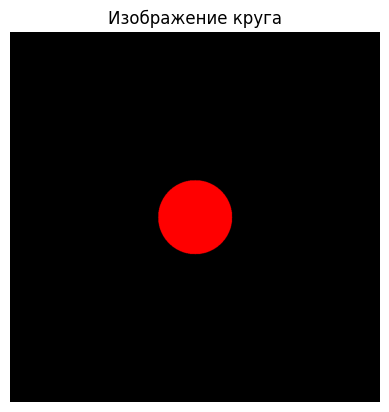

In [124]:
circle_image = generate_circle_image(100, color, (1000, 1000))

plt.imshow(circle_image)
plt.title("Изображение круга")
plt.axis("off")
plt.show()


Задача 7
Написать функцию, которая стандартизирует все значения тензор (отнять мат. ожидание и поделить на СКО)


In [125]:
def standardize_tensor(tensor):
    return (tensor.mean() - tensor.std()) / tensor.std()

In [ ]:
print("Входные данные: ", tensor_for_standardization)
print("Стандартизированный тензор:\n",
      standardize_tensor(tensor_for_standardization))

Входные данные:  [[[0.31088428 0.48985779 0.56015779]
  [0.48347506 0.44703058 0.3265738 ]
  [0.6591088  0.37807008 0.74977253]
  [0.15731927 0.6569766  0.5441686 ]]

 [[0.4475063  0.16954018 0.8206201 ]
  [0.70587487 0.69301214 0.15933242]
  [0.51693126 0.7031371  0.33003434]
  [0.01994446 0.47912342 0.49664475]]

 [[0.95422451 0.36476131 0.87669202]
  [0.11331225 0.13455919 0.9997159 ]
  [0.40871139 0.57485908 0.09241044]
  [0.76050415 0.61315543 0.18298003]]

 [[0.08356824 0.81353664 0.94341742]
  [0.9623935  0.4753673  0.44779634]
  [0.46994127 0.0152495  0.87835712]
  [0.27425788 0.90558264 0.90652583]]]
Стандартизированный тензор:
 0.8351879791634889



Задача 8
Написать функцию, выделяющую часть матрицы фиксированного размера с центром в данном элементе (дополненное значением fill если необходимо)


In [ ]:
def extract_submatrix(matrix, center, size, fill_value=0):
    rows, cols = size
    row_start = center[0] - rows // 2
    col_start = center[1] - cols // 2
    submatrix = np.full(size, fill_value)

    for i in range(rows):
        for j in range(cols):
            source_row = row_start + i
            source_col = col_start + j
            if 0 <= source_row < matrix.shape[0] and 0 <= source_col < matrix.shape[1]:
                submatrix[i, j] = matrix[source_row, source_col]
    return submatrix

In [155]:
print("Входная матрица:\n", matrix)
cropped_matrix = extract_submatrix(matrix, center, size)
print("Выделенная часть матрицы:\n", cropped_matrix)

Входная матрица:
 [[8 0 8 8 4 8 4 4]
 [6 2 3 7 8 6 8 4]
 [5 8 8 5 8 0 5 7]
 [1 6 7 0 0 2 0 0]
 [0 4 6 3 5 7 7 6]
 [9 0 8 9 5 3 7 9]
 [5 0 8 2 2 9 2 1]
 [2 1 8 4 2 6 8 6]]
Выделенная часть матрицы:
 [[0 0 2]
 [3 5 7]
 [9 5 3]]



Задача 9
Написать функцию, которая находит самое часто встречающееся число в каждой строке матрицы и возвращает массив этих значений


In [ ]:
def counter_per_row(matrix):
    most_frequent = []
    for row in matrix:
        counts = {}
        for num in row:
            if num in counts:
                counts[num] += 1
            else:
                counts[num] = 1
        # print(counts)
        most_frequent.append(max(counts, key=counts.get))
    return np.array(most_frequent)

In [170]:
print("Входная матрица:\n", matrix_for_counters)
print("Результат:\n", counter_per_row(matrix_for_counters))

Входная матрица:
 [[0 3 2 4 2 0 2 0 0 2]
 [4 0 4 4 1 4 1 0 1 0]
 [0 3 1 2 4 2 3 2 2 2]
 [2 1 2 4 0 0 2 3 1 1]
 [4 4 0 1 2 2 2 2 2 0]]
Результат:
 [0 4 2 2 2]



Задача 10
Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Написать функцию, которая складывает каналы изображения с указанными весами, и возвращает результат в виде матрицы размера (height, width)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


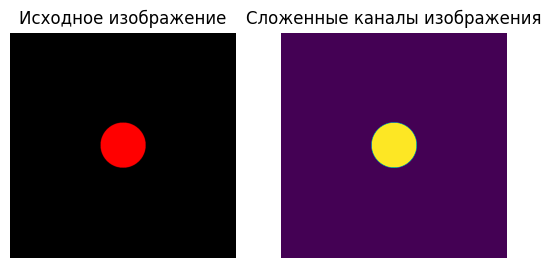

In [198]:
def weighted_channel_sum(image, weights):
    return np.tensordot(image, weights, axes=([2], [0]))


weighted_image = weighted_channel_sum(circle_image, channel_weights)

# print(image_array[0], "\n---------\n", weighted_image[0])
# print(weighted_image)

plt.subplot(121)
plt.imshow(circle_image)
plt.title("Исходное изображение")
plt.axis("off")

plt.subplot(122)
plt.imshow(weighted_image)
plt.title("Сложенные каналы изображения")
plt.axis("off")
plt.show()